In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from Functions import *

In [7]:
df = pd.read_csv("training_dataset.csv")
df.head()

,Mean,std,Variance,Skewness,Entropy,RMS,Kurtios,HMI1,HMI2,HMI3,...,homogeneity4,energy1,energy2,energy3,energy4,correlation1,correlation2,correlation3,correlation4,Class
0,42.088384,50.356683,2535.795494,2.049944,6.553086,8.875129,5.073736,2.617668,7.231273,9.914340,...,0.306209,0.212378,0.206820,0.214469,0.205028,0.895421,0.864810,0.906165,0.862465,0
1,55.212544,46.056565,2121.207208,0.370450,5.375762,9.302612,-0.628678,2.752905,8.030957,11.070417,...,0.513325,0.177499,0.172328,0.180325,0.171641,0.969317,0.959636,0.974818,0.958198,0
2,76.037273,79.565990,6330.746828,0.585233,5.781641,7.635726,-0.877843,2.904895,7.803627,12.448359,...,0.432991,0.230150,0.221221,0.232777,0.221043,0.969677,0.958555,0.973180,0.957760,0
3,49.957904,48.439813,2346.415459,1.237070,5.764681,10.755480,1.467716,2.720641,7.122902,10.259218,...,0.466591,0.179320,0.170887,0.181765,0.170025,0.959890,0.947522,0.966923,0.945591,0
4,53.652053,59.587603,3550.682395,1.574931,4.946379,10.302398,2.218936,2.779911,7.267831,10.447366,...,0.490227,0.232071,0.220649,0.233649,0.221646,0.949499,0.932350,0.958399,0.931763,0


In [3]:
data_analysis(df)

The shape of the data set:
The data set consists of 5711 rows and 40 columns.

***********************************************
The existence of missing values in each column:
Mean                   False
std                    False
Variance               False
Skewness               False
Entropy                False
RMS                    False
Kurtios                False
HMI1                   False
HMI2                   False
HMI3                   False
HMI4                   False
Area                    True
Perimeter               True
Circle                  True
Convex Area             True
Solidity                True
Equivalent Diameter     True
Major Axis              True
Minor Axis              True
contrast1              False
contrast2              False
contrast3              False
contrast4              False
dissimilarity1         False
dissimilarity2         False
dissimilarity3         False
dissimilarity4         False
homogeneity1           False
homogeneity2 

In [4]:
# df = df.dropna()

missing_data = ['Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis']
for i in missing_data:
    fill_list = df[i].dropna().tolist()
    # df[i] = df[i].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
    mean_fill = np.mean(fill_list)
    df[i] = df[i].fillna(mean_fill)
df.isnull().sum()

Mean                   0
std                    0
Variance               0
Skewness               0
Entropy                0
RMS                    0
Kurtios                0
HMI1                   0
HMI2                   0
HMI3                   0
HMI4                   0
Area                   0
Perimeter              0
Circle                 0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
contrast1              0
contrast2              0
contrast3              0
contrast4              0
dissimilarity1         0
dissimilarity2         0
dissimilarity3         0
dissimilarity4         0
homogeneity1           0
homogeneity2           0
homogeneity3           0
homogeneity4           0
energy1                0
energy2                0
energy3                0
energy4                0
correlation1           0
correlation2           0
correlation3           0
correlation4           0
Class                  0


In [5]:
X = df.drop(columns=["Class"])
y = df["Class"]

feature selection

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

RF

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)
print(f"Train Acc of Random Forest : {rf_clf.score(X_train,y_train)}")
# rf_clf.score(X_test,y_test)
print(f"Test Acc of Random Forest : {rf_clf.score(X_test,y_test)}")

Train Acc of Random Forest : 1.0
Test Acc of Random Forest : 0.8906386701662292


SVM

In [10]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf',C=100,gamma=0.001)
clf1.fit(X_train, y_train)
print(f"Train Acc of SVM : {clf1.score(X_train,y_train)}")
print(f"Test Acc of SVM : {clf1.score(X_test,y_test)}")

Train Acc of SVM : 1.0
Test Acc of SVM : 0.4925634295713036


KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=7)
# Fit the data to knn model
knn2.fit(X_trainn,y_trainn)
print(f"Train acc of KNN  : {knn2.score(X_trainn,y_trainn)}")
print(f"Test acc of KNN  : {knn2.score(X_testn,y_testn)}")

Train acc of KNN  : 0.899737302977233
Test acc of KNN  : 0.8705161854768154


PCA and StandardScaler

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_m = PCA(n_components=37)

new_X = pca_m.fit_transform(X)
scaler = StandardScaler()
new_X = scaler.fit_transform(new_X)

In [13]:
X_trainn,X_testn,y_trainn,y_testn = train_test_split(new_X,y,test_size=0.2,random_state=42)

RF PCA

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf2.fit(X_trainn, y_trainn)
print(f"Train Acc of Random Forest PCA : {rf_clf2.score(X_trainn,y_trainn)}")
print(f"Test Acc of Random Forest PCA : {rf_clf2.score(X_testn,y_testn)}")

Train Acc of Random Forest PCA : 1.0
Test Acc of Random Forest PCA : 0.9002624671916011


SVM PCA

In [15]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear',C=100,gamma=0.001)
clf2.fit(X_trainn, y_trainn)

print(f"Train Acc of SVM PCA : {clf2.score(X_trainn,y_trainn)}")
print(f"Test Acc of SVM PCA : {clf2.score(X_testn,y_testn)}")

Train Acc of SVM PCA : 0.8669001751313485
Test Acc of SVM PCA : 0.8643919510061242


KNN PCA

In [17]:
knn2 = KNeighborsClassifier(n_neighbors=7)
# Fit the data to knn model
knn2.fit(X_trainn,y_trainn)
print(f"Train acc of KNN PCA : {knn2.score(X_trainn,y_trainn)}")
print(f"Test acc of KNN PCA : {knn2.score(X_testn,y_testn)}")

Train acc of KNN PCA : 0.899737302977233
Test acc of KNN PCA : 0.8705161854768154


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classification_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot the confusion matrix
    labels = np.unique(y_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

RF 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


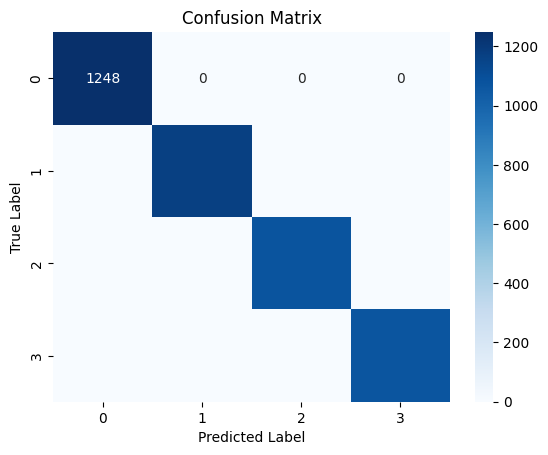

In [23]:
evaluate_classification_model(rf_clf2,X_trainn,y_trainn)

SVM

Accuracy: 0.8669001751313485
Precision: 0.8649566730060104
Recall: 0.8669001751313485
F1-score: 0.865646717814882


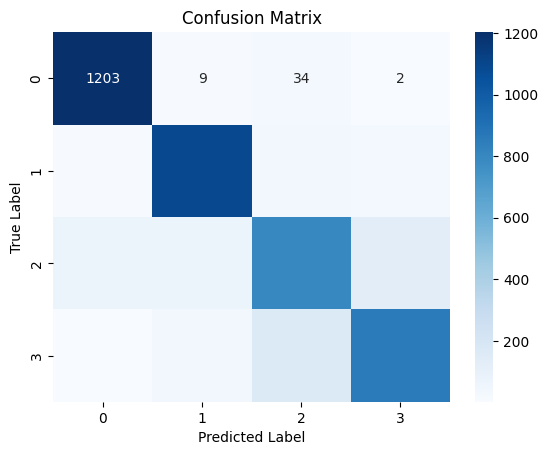

In [25]:
evaluate_classification_model(clf2,X_trainn,y_trainn)

KNN

Accuracy: 0.899737302977233
Precision: 0.900298164781378
Recall: 0.899737302977233
F1-score: 0.8993005473643423


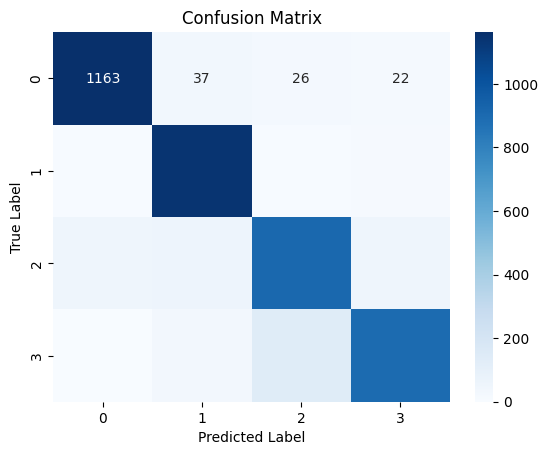

In [26]:
evaluate_classification_model(knn2,X_trainn,y_trainn)

In [28]:
def cmatrix_fun(model_name, actual, predicted, color):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=color)

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()